In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from __future__ import division

In [2]:
BefolkingKBH_Data = pd.read_csv('../Data/befkbhalderstatkode.csv')

In [3]:
BefolkingKBH_Data = BefolkingKBH_Data[BefolkingKBH_Data['STATKODE'] != 5001]

In [4]:
BefolkingKBH_Data

,AAR,BYDEL,ALDER,STATKODE,PERSONER
0,2015,1,0,5100,614
1,2015,1,0,5104,2
2,2015,1,0,5106,1
3,2015,1,0,5110,1
4,2015,1,0,5120,4
5,2015,1,0,5126,1
6,2015,1,0,5130,5
7,2015,1,0,5140,3
8,2015,1,0,5150,5
9,2015,1,0,5154,1


In [5]:
BefolkingKBH_Data[BefolkingKBH_Data['STATKODE'] == 5106]

,AAR,BYDEL,ALDER,STATKODE,PERSONER
2,2015,1,0,5106,1
24,2015,1,1,5106,2
68,2015,1,3,5106,1
88,2015,1,4,5106,1
110,2015,1,5,5106,1
133,2015,1,6,5106,6
150,2015,1,7,5106,3
165,2015,1,8,5106,1
183,2015,1,9,5106,1
196,2015,1,10,5106,2


In [6]:
BefolkingKBH_Data[((BefolkingKBH_Data['STATKODE'] == 5110) & (BefolkingKBH_Data['ALDER'] == 10) & (BefolkingKBH_Data['BYDEL'] == 8))]

,AAR,BYDEL,ALDER,STATKODE,PERSONER
77335,2013,8,10,5110,1
158832,2010,8,10,5110,1
184700,2009,8,10,5110,1
233380,2007,8,10,5110,1
279171,2005,8,10,5110,1
324104,2003,8,10,5110,1
389892,2000,8,10,5110,1
431997,1998,8,10,5110,1
452289,1997,8,10,5110,1
522495,1993,8,10,5110,2


In [7]:
BefolkingKBH_Data['Perc'] = np.zeros(len(BefolkingKBH_Data['BYDEL']))
BefolkingKBH_Data_noDanes = BefolkingKBH_Data[(BefolkingKBH_Data['STATKODE'] != 5100)].copy()
print BefolkingKBH_Data_noDanes
print BefolkingKBH_Data

         AAR  BYDEL  ALDER  STATKODE  PERSONER  Perc
1       2015      1      0      5104         2   0.0
2       2015      1      0      5106         1   0.0
3       2015      1      0      5110         1   0.0
4       2015      1      0      5120         4   0.0
5       2015      1      0      5126         1   0.0
6       2015      1      0      5130         5   0.0
7       2015      1      0      5140         3   0.0
8       2015      1      0      5150         5   0.0
9       2015      1      0      5154         1   0.0
10      2015      1      0      5164         3   0.0
11      2015      1      0      5170         3   0.0
12      2015      1      0      5180         3   0.0
13      2015      1      0      5228         1   0.0
14      2015      1      0      5306         2   0.0
15      2015      1      0      5390         1   0.0
16      2015      1      0      5448         1   0.0
17      2015      1      0      5464         1   0.0
18      2015      1      0      5472         1

In [8]:
StatkodeList = BefolkingKBH_Data.STATKODE.unique()
BydelList = BefolkingKBH_Data.BYDEL.unique()
AlderList = BefolkingKBH_Data.ALDER.unique()
AarList = BefolkingKBH_Data.AAR.unique()

StatkodeList_noDanes = BefolkingKBH_Data_noDanes.STATKODE.unique()
BydelList_noDanes = BefolkingKBH_Data_noDanes.BYDEL.unique()
AlderList_noDanes = BefolkingKBH_Data_noDanes.ALDER.unique()
AarList_noDanes = BefolkingKBH_Data_noDanes.AAR.unique()

#print sum((BefolkingKBH_Data[((BefolkingKBH_Data['AAR'] == 2015) & ( (BefolkingKBH_Data['STATKODE'] == 5100) ) & ( (BefolkingKBH_Data['BYDEL'] == 1) ) )])['PERSONER'])
#(BefolkingKBH_Data[((BefolkingKBH_Data['AAR'] == 2015) & ( (BefolkingKBH_Data['STATKODE'] == 5100) ) & ( (BefolkingKBH_Data['BYDEL'] == 1) ) )])

In [9]:
Data_Array = np.array([]).reshape(0,5)
print Data_Array
Data_Array_noDanes = np.array([]).reshape(0,5)

#for val,i in enumerate(AarList):
#    print i
#    print val

[]


In [10]:
for val,i in enumerate(AarList):
    print i
    for val2,j in enumerate(StatkodeList):
        for val3,k in enumerate(BydelList):
            Total = sum((BefolkingKBH_Data[((BefolkingKBH_Data['AAR'] == i)  & ( (BefolkingKBH_Data['BYDEL'] == k) ) )])['PERSONER'])
            Total_Country = sum((BefolkingKBH_Data[((BefolkingKBH_Data['AAR'] == i) & ( (BefolkingKBH_Data['STATKODE'] == j) ) & ( (BefolkingKBH_Data['BYDEL'] == k) ) )])['PERSONER'])
            if Total == 0:
                data = 0.0
            else :
                data = Total_Country/Total
            Data_Array = np.append(Data_Array,[[i,j,k,Total_Country,data]],axis = 0)

2015
2014
2013
2012
2011
2010
2009
2008
2007
2006
2005
2004
2003
2002
2001
2000
1999
1998
1997
1996
1995
1994
1993
1992


In [11]:
for val,i in enumerate(AarList_noDanes):
    print i
    for val2,j in enumerate(StatkodeList_noDanes):
        for val3,k in enumerate(BydelList_noDanes):
            Total = sum((BefolkingKBH_Data_noDanes[((BefolkingKBH_Data_noDanes['AAR'] == i)  & ( (BefolkingKBH_Data_noDanes['BYDEL'] == k) ) )])['PERSONER'])
            Total_Country = sum((BefolkingKBH_Data_noDanes[((BefolkingKBH_Data_noDanes['AAR'] == i) & ( (BefolkingKBH_Data_noDanes['STATKODE'] == j) ) & ( (BefolkingKBH_Data_noDanes['BYDEL'] == k) ) )])['PERSONER'])
            if Total == 0:
                data = 0.0
            else :
                data = Total_Country/Total
            Data_Array_noDanes = np.append(Data_Array_noDanes,[[i,j,k,Total_Country,data]],axis = 0)

2015
2014
2013
2012
2011
2010
2009
2008
2007
2006
2005
2004
2003
2002
2001
2000
1999
1998
1997
1996
1995
1994
1993
1992


In [12]:
Kbh_Stats = pd.DataFrame(Data_Array, columns = ['AAR', 'STATKODE', 'BYDEL','Total','Percentage'])
Kbh_Stats = Kbh_Stats.sort_values(['AAR', 'STATKODE', 'BYDEL'], ascending = [1,1,1])
Kbh_Stats

,AAR,STATKODE,BYDEL,Total,Percentage
48829,1992.0,5100.0,1.0,37707.0,0.928858
48830,1992.0,5100.0,2.0,58717.0,0.943685
48831,1992.0,5100.0,3.0,58210.0,0.865563
48832,1992.0,5100.0,4.0,41219.0,0.861349
48833,1992.0,5100.0,5.0,41167.0,0.942295
48834,1992.0,5100.0,6.0,33022.0,0.962656
48835,1992.0,5100.0,7.0,34650.0,0.942960
48836,1992.0,5100.0,8.0,38717.0,0.929178
48837,1992.0,5100.0,9.0,41868.0,0.924157
48838,1992.0,5100.0,10.0,39943.0,0.934383


In [13]:
Kbh_Stats_noDanes = pd.DataFrame(Data_Array_noDanes, columns = ['AAR', 'STATKODE', 'BYDEL','Total','Percentage'])
Kbh_Stats_noDanes = Kbh_Stats_noDanes.sort_values(['AAR', 'STATKODE', 'BYDEL'], ascending = [1,1,1])
Kbh_Stats_noDanes[Kbh_Stats_noDanes['STATKODE'] == 5106]

,AAR,STATKODE,BYDEL,Total,Percentage
48587,1992.0,5106.0,1.0,64.0,0.022161
48588,1992.0,5106.0,2.0,75.0,0.021404
48589,1992.0,5106.0,3.0,106.0,0.011724
48590,1992.0,5106.0,4.0,68.0,0.010249
48591,1992.0,5106.0,5.0,22.0,0.008727
48592,1992.0,5106.0,6.0,29.0,0.022639
48593,1992.0,5106.0,7.0,33.0,0.015744
48594,1992.0,5106.0,8.0,24.0,0.008133
48595,1992.0,5106.0,9.0,163.0,0.047439
48596,1992.0,5106.0,10.0,62.0,0.022103


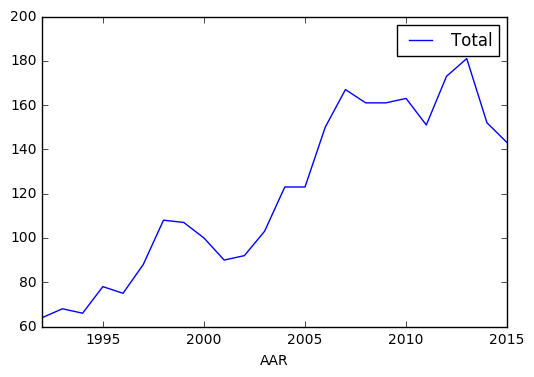

In [14]:
Kbh_Stats_noDanes[((Kbh_Stats_noDanes['STATKODE'] == 5106) & (Kbh_Stats_noDanes['BYDEL'] == 1))].plot(x = 'AAR', y = 'Total')
plt.show()

In [15]:
Data_noDanes_Allcph = np.array([]).reshape(0,4)

In [16]:
for val,i in enumerate(AarList_noDanes):
    print i
    for val2,j in enumerate(StatkodeList_noDanes):
        Total = sum((BefolkingKBH_Data_noDanes[((BefolkingKBH_Data_noDanes['AAR'] == i) )])['PERSONER'])
        Total_Country = sum((BefolkingKBH_Data_noDanes[((BefolkingKBH_Data_noDanes['AAR'] == i) & ( (BefolkingKBH_Data_noDanes['STATKODE'] == j) ) )])['PERSONER'])
        if Total == 0:
            data = 0.0
        else :
            data = Total_Country/Total
        Data_noDanes_Allcph = np.append(Data_noDanes_Allcph,[[i,j,Total_Country,data]],axis = 0)

2015
2014
2013
2012
2011
2010
2009
2008
2007
2006
2005
2004
2003
2002
2001
2000
1999
1998
1997
1996
1995
1994
1993
1992


In [17]:
Kbh_Stats_noDanes_nobydel = pd.DataFrame(Data_noDanes_Allcph, columns = ['AAR', 'STATKODE', 'Total' ,'Percentage'])
Kbh_Stats_noDanes_nobydel = Kbh_Stats_noDanes_nobydel.sort_values(['AAR', 'STATKODE'], ascending = [1,1])
Kbh_Stats_noDanes_nobydel

,AAR,STATKODE,Total,Percentage
4577,1992.0,5102.0,7.0,0.000185
4468,1992.0,5103.0,593.0,0.015689
4416,1992.0,5104.0,528.0,0.013970
4546,1992.0,5105.0,13.0,0.000344
4417,1992.0,5106.0,652.0,0.017251
4591,1992.0,5107.0,1.0,0.000026
4540,1992.0,5108.0,2.0,0.000053
4418,1992.0,5110.0,1881.0,0.049767
4444,1992.0,5115.0,6.0,0.000159
4419,1992.0,5120.0,1780.0,0.047095


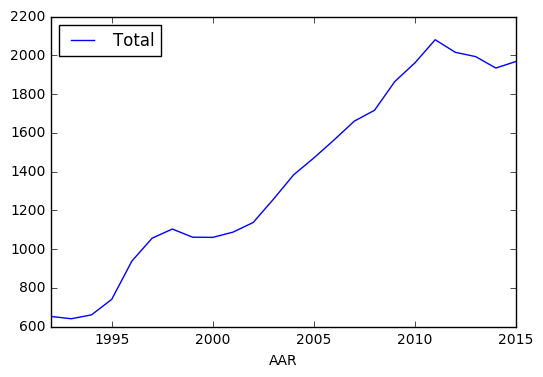

In [18]:
Kbh_Stats_noDanes_nobydel[Kbh_Stats_noDanes_nobydel['STATKODE'] == 5106].plot(x = 'AAR', y = 'Total')
plt.show()

In [27]:
deCoder = pd.read_csv('../Data/Statcode_decoder.csv')
deCoderBydel = pd.read_csv('../Data/Bydel_decoder.csv')

In [20]:
#Kbh_Stats_noDanes_nobydel[(Kbh_Stats_noDanes_nobydel['STATKODE'] == 5102)]['Country'] == 
len(deCoder)
for i in range(len(deCoder)):
    #print deCoder['STATKODE'][i]
    #print deCoder['COUNTRY'][i]
    #if not Kbh_Stats_noDanes_nobydel[(Kbh_Stats_noDanes_nobydel['STATKODE'] == deCoder['STATKODE'][i])]['Country'].empty:
    #Kbh_Stats_noDanes_nobydel[(Kbh_Stats_noDanes_nobydel['STATKODE'] == deCoder['STATKODE'][i])]['Country'] = 2
    #dfmi.loc[:,('one','second')] = value
    Kbh_Stats_noDanes.loc[(Kbh_Stats_noDanes['STATKODE'] == deCoder['STATKODE'][i]),('COUNTRY')] = deCoder['COUNTRY'][i]
    Kbh_Stats.loc[(Kbh_Stats['STATKODE'] == deCoder['STATKODE'][i]),('COUNTRY')] = deCoder['COUNTRY'][i]
    Kbh_Stats_noDanes_nobydel.loc[(Kbh_Stats_noDanes_nobydel['STATKODE'] == deCoder['STATKODE'][i]),('COUNTRY')] = deCoder['COUNTRY'][i]

In [35]:
for i in range(len(deCoderBydel)):
    Kbh_Stats_noDanes.loc[(Kbh_Stats_noDanes['BYDEL'] == deCoderBydel['BYDELNR'][i]),('DISTRICT')] = deCoderBydel['BYDEL'][i]
    Kbh_Stats.loc[(Kbh_Stats['BYDEL'] == deCoderBydel['BYDELNR'][i]),('DISTRICT')] = deCoderBydel['BYDEL'][i]
    
Kbh_Stats_noDanes

,AAR,STATKODE,BYDEL,Total,Percentage,COUNTRY,DISTRICT
50347,1992.0,5102.0,1.0,0.0,0.000000,Udlandet uoplyst,Indre By
50348,1992.0,5102.0,2.0,0.0,0.000000,Udlandet uoplyst,Østerbro
50349,1992.0,5102.0,3.0,1.0,0.000111,Udlandet uoplyst,Nørrebro
50350,1992.0,5102.0,4.0,0.0,0.000000,Udlandet uoplyst,Vesterbro/Kgs. Enghave
50351,1992.0,5102.0,5.0,0.0,0.000000,Udlandet uoplyst,Valby
50352,1992.0,5102.0,6.0,0.0,0.000000,Udlandet uoplyst,Vanløse
50353,1992.0,5102.0,7.0,0.0,0.000000,Udlandet uoplyst,Brønshøj-Husum
50354,1992.0,5102.0,8.0,0.0,0.000000,Udlandet uoplyst,Bispebjerg
50355,1992.0,5102.0,9.0,2.0,0.000582,Udlandet uoplyst,Amager Øst
50356,1992.0,5102.0,10.0,1.0,0.000357,Udlandet uoplyst,Amager Vest


In [36]:
out = Kbh_Stats_noDanes_nobydel.to_json()
with open('KBH_stats_noDanes_noBydel.json', 'w') as f:
    f.write(out)
Kbh_Stats_noDanes_nobydel.to_csv('KBH_Stats_noDanes_noBydel_1.csv', sep=',', encoding='utf-8',index = False)

In [ ]:
5107

In [39]:
Kbh_Stats_noDanes[Kbh_Stats_noDanes['STATKODE'] == 5107]

,AAR,STATKODE,BYDEL,Total,Percentage,COUNTRY,DISTRICT
50501,1992.0,5107.0,1.0,0.0,0.000000,Liechtenstein,Indre By
50502,1992.0,5107.0,2.0,0.0,0.000000,Liechtenstein,Østerbro
50503,1992.0,5107.0,3.0,0.0,0.000000,Liechtenstein,Nørrebro
50504,1992.0,5107.0,4.0,0.0,0.000000,Liechtenstein,Vesterbro/Kgs. Enghave
50505,1992.0,5107.0,5.0,0.0,0.000000,Liechtenstein,Valby
50506,1992.0,5107.0,6.0,0.0,0.000000,Liechtenstein,Vanløse
50507,1992.0,5107.0,7.0,0.0,0.000000,Liechtenstein,Brønshøj-Husum
50508,1992.0,5107.0,8.0,1.0,0.000339,Liechtenstein,Bispebjerg
50509,1992.0,5107.0,9.0,0.0,0.000000,Liechtenstein,Amager Øst
50510,1992.0,5107.0,10.0,0.0,0.000000,Liechtenstein,Amager Vest


In [37]:
out = Kbh_Stats_noDanes.to_json()
with open('KBH_stats_noDanes.json', 'w') as f:
    f.write(out)
    
Kbh_Stats_noDanes.to_csv('KBH_Stats_noDanes.csv', sep=',', encoding='utf-8',index = False)

In [38]:
out = Kbh_Stats.to_json()
with open('KBH_stats.json', 'w') as f:
    f.write(out)
Kbh_Stats.to_csv('KBH_Stats.csv', sep=',', encoding='utf-8',index = False)

In [25]:
Kbh_Stats_noDanes_nobydel

,AAR,STATKODE,Total,Percentage,COUNTRY
4577,1992.0,5102.0,7.0,0.000185,Udlandet uoplyst
4468,1992.0,5103.0,593.0,0.015689,Statsløs
4416,1992.0,5104.0,528.0,0.013970,Finland
4546,1992.0,5105.0,13.0,0.000344,Island ligeret dansk
4417,1992.0,5106.0,652.0,0.017251,Island
4591,1992.0,5107.0,1.0,0.000026,Liechtenstein
4540,1992.0,5108.0,2.0,0.000053,Luxembourg
4418,1992.0,5110.0,1881.0,0.049767,Norge
4444,1992.0,5115.0,6.0,0.000159,Kongelig
4419,1992.0,5120.0,1780.0,0.047095,Sverige
